In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import SequenceMatcher
%matplotlib inline
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding = 'unicode_escape')
pd.set_option('display.max_row', 200)
df.head(200)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [2]:
df.describe()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,In Process,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [3]:
print(df['Publisher'].nunique())
print(df['Journal title'].nunique())

299
984


In [4]:
#We now apply several string cleaning techniques to the Journal title column. We make a new column.

df['Journal title clean'] = df['Journal title']

In [5]:
#No ampersands; only the word 'and'

df['Journal title clean'] = df['Journal title clean'].replace('&', ' AND ', regex=True)

In [6]:
#Remove leading and trailing whitespace

df['Journal title clean'] = df['Journal title clean'].str.strip()

In [7]:
#Replace double+ whitespace with single whitespace

df['Journal title clean'] = df['Journal title clean'].replace('\s+', ' ', regex=True)

In [8]:
print(df['Journal title clean'].nunique())

948


In [9]:
#Eliminate symbols and then fix white space again; we also make sure that every entry in the column is a string

df['Journal title clean'] = df['Journal title clean'].replace({'\.',',','/','-','Ltd','LTD','Inc','INC','\(','\)'}, ' ', regex=True)

df['Journal title clean'] = df['Journal title clean'].str.strip()
df['Journal title clean'] = df['Journal title clean'].replace('\s+', ' ', regex=True)

df['Journal title clean'] = df['Journal title clean'].astype(str)

In [10]:
print(df['Journal title clean'].nunique())

945


In [11]:
#Lower case

df['Journal title clean'] = df['Journal title clean'].str.lower()

In [12]:
print(df['Journal title clean'].nunique())

875


In [13]:
#a ratio measure of the similarity of two strings a and b

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [14]:
#A function that replaces similar strings in an array. I'm not claiming that it is computationally efficient.
#The function takes two arguments: an array and the threshold (ratio)

def replace_similar(x,r):
    y = x
    for i in range(len(y)):
        if i > 0:
            for j in range(i):
                if similar(y[i],y[j]) > r:
                   y[i] = y[j]
    return y

In [15]:
df1 = df['Journal title clean'].unique()
df1.sort()
df1

array(['academy of nutrition and dietetics', 'acs chemical biology',
       'acs chemical neuroscience', 'acs nano',
       'acta crystallographica section d',
       'acta crystallographica section d biological crystallography',
       'acta crystallographica section d: biological crystallography',
       'acta crystallographica section f: structural biology and crystallization communications',
       'acta crystallography d', 'acta d', 'acta dermato venereologica',
       'acta diabetologica', 'acta f', 'acta neuropathol',
       'acta neuropathologica', 'acta opthalmologica', 'acta physiol',
       'addiction', 'advances in experimental medicine and biology',
       'age', 'age and ageing', 'ageing and society', 'aging cell',
       'aids', 'aids behav', 'aids care', 'aids journal',
       'aids research and therapy', 'aids uk', 'alcohol and alcoholism',
       'alimentrary pharmacology and therapeutics', 'am j bioeth',
       'am j trop med hyg', 'americal journal of psychiatry',
 

In [16]:
#Using an 85 percent similarity ratio to handle spelling errors and other errors that are in the same vein

df['Journal title clean']=replace_similar(df['Journal title clean'],0.85)

In [17]:
df['Journal title clean'].unique()

array(['psychological medicine', 'biomacromolecules', 'j med chem',
       'j org chem', 'journal of medicinal chemistry',
       'journal of proteome research', 'mol pharm',
       'acs chemical biology',
       'journal of chemical information and modeling', 'biochemistry',
       'gastroenterology', 'journal of biological chemistry',
       'journal of immunology', 'acs chemical neuroscience', 'acs nano',
       'american chemical society', 'analytical chemistry',
       'bioconjugate chemistry',
       'journal of the american chemical society', 'chest',
       'journal of neurophysiology', 'american journal of psychiatry',
       'behavioral neuroscience', 'emotion', 'health psychology',
       'journal of abnormal psychology',
       'journal of consulting and clinical psychology',
       'journal of experimental psychology: animal behaviour process',
       'journal of experimental psychology: human perception and performance',
       'psychological assessment', 'psychological r

In [18]:
df['Journal title clean'].nunique()

743

In [19]:
#After cleaning we group number of articles by journal.

articles_by_journal = df.groupby('Journal title clean')['Article title'].nunique().sort_values(ascending=False)
articles_by_journal.head(75)

Journal title clean
plos one                                                   199
journal of biological chemistry                             64
neuroimage                                                  31
nucleic acids research                                      29
proceedings of the national academy of sciences             25
plos pathogens                                              24
plos genetics                                               24
neglected tropical disease                                  23
human molecular genetics                                    20
nature communications                                       19
journal of neurophysiology                                  19
journal of neuroscience                                     17
bmc public health                                           17
movement disorders                                          15
faseb journal                                               15
biochem journal                    

In [20]:
#Let's compare to the original journal column

articles_by_journal = df.groupby('Journal title')['Article title'].nunique().sort_values(ascending=False)
articles_by_journal.head(75)

Journal title
PLoS One                                                   91
PLoS ONE                                                   62
Journal of Biological Chemistry                            48
Nucleic Acids Research                                     21
Proceedings of the National Academy of Sciences            19
Human Molecular Genetics                                   18
PLoS Neglected Tropical Diseases                           18
Nature Communications                                      17
PLoS Pathogens                                             15
PLoS Genetics                                              15
Neuroimage                                                 15
Brain                                                      14
NeuroImage                                                 14
PLOS ONE                                                   14
BMC Public Health                                          14
Movement Disorders                                      

In [21]:
#although the cleaning is not perfect; it appears to be a great improvement. Here are the top five journals by article number

articles_by_journal = df.groupby('Journal title clean')['Article title'].nunique().sort_values(ascending=False)
articles_by_journal.head(5)

Journal title clean
plos one                                           199
journal of biological chemistry                     64
neuroimage                                          31
nucleic acids research                              29
proceedings of the national academy of sciences     25
Name: Article title, dtype: int64

In [32]:
top_five = articles_by_journal.head(5).index
top_five

Index(['plos one', 'journal of biological chemistry', 'neuroimage',
       'nucleic acids research',
       'proceedings of the national academy of sciences'],
      dtype='object', name='Journal title clean')

In [22]:
#Since we wish to compute the mean, we need to convert the money to floats

df['COST float'] = df['COST (£) charged to Wellcome (inc VAT when charged)'].str.strip('£')
df['COST float'] = df['COST float'].str.strip('$')
df['COST float'] = df['COST float'].astype('float')

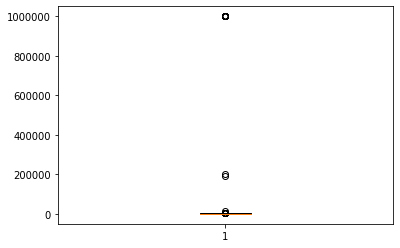

In [23]:
plt.boxplot(df['COST float'])
plt.show()

In [25]:
#There appears to be nonsense cost values for some of the articles; They all have the same error of six 9's.
#Winsorization is probably not good here, since the six 9's are probably not from high cost, but an entry error.
#Consequently for computing mean, median, and standard deviation of the top five journals, we will delete these entries.
#The next two highest article costs after the six 9's error are an order of magnitude beyond everything else;
#this is likely a decimal place error, but it's hard to determine exactly what the error is with these. We delete these
#entries as well. The next highest article cost at 13200 is still quite large at over double the next lowest value;
#since it's nowhere near as "bad" as an order of magnitude higher, we retain the this and the remaining data.

df['COST float'].sort_values(ascending=False).head(60)

1564    999999.00
996     999999.00
560     999999.00
1565    999999.00
1309    999999.00
1675    999999.00
1664    999999.00
630     999999.00
660     999999.00
1208    999999.00
1367    999999.00
669     999999.00
1046    999999.00
670     999999.00
227     999999.00
1616    999999.00
1614    999999.00
1036    999999.00
1612    999999.00
1598    999999.00
1597    999999.00
945     999999.00
1566    999999.00
1256    999999.00
873     999999.00
1939    999999.00
1386    999999.00
277     999999.00
149     999999.00
491     999999.00
1947    999999.00
1560    999999.00
811     999999.00
815     999999.00
1961    999999.00
410     999999.00
404     999999.00
1387    999999.00
1563    999999.00
1138    999999.00
1835    999999.00
825     999999.00
829     999999.00
1561    999999.00
358     999999.00
1562    999999.00
1065    999999.00
1987    201024.00
1470    192645.00
986      13200.00
1619      6000.00
800       5760.00
648       4800.00
552       4800.00
798       4800.00
797       

In [81]:
df1 = df.drop(df[df['COST float'] > 15000].index)

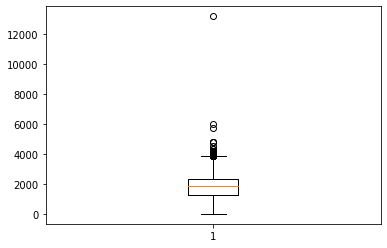

In [82]:
plt.boxplot(df1['COST float'])
plt.show()

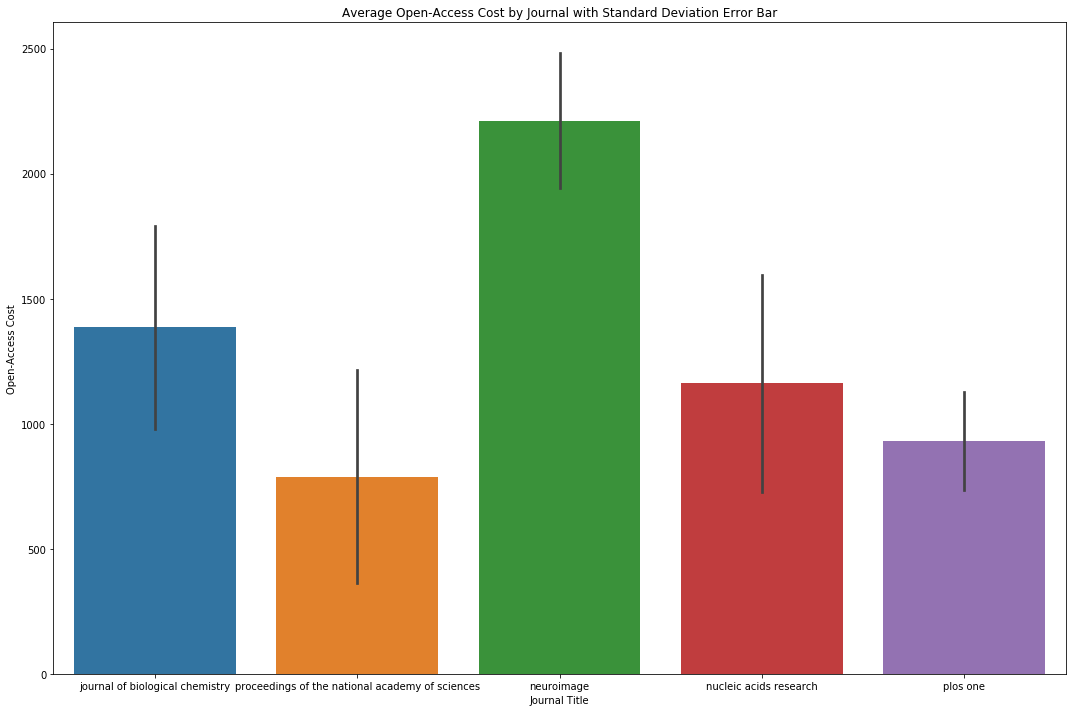

In [83]:
#For our top five journals, we get visuals for the mean, median, and standard deviation of open-access cost.
#First is a plot for the mean and standard deviation.

df2 = df1[df1['Journal title clean'].isin(top_five)]

plt.figure(figsize=(15,10))
fig = sns.barplot(x=df2['Journal title clean'] ,y=df2['COST float'],ci="sd")
fig.set_title('Average Open-Access Cost by Journal with Standard Deviation Error Bar')
fig.set(xlabel='Journal Title', ylabel='Open-Access Cost')
plt.tight_layout()
plt.show()

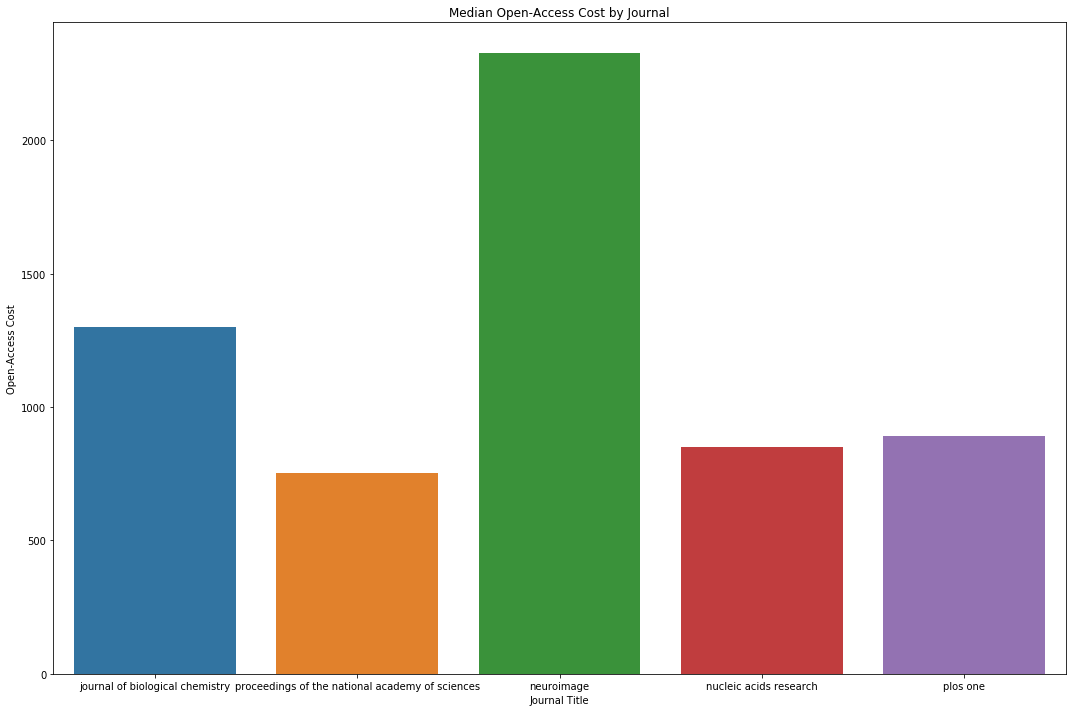

In [84]:
#Plot of median open-access cost by journal

plt.figure(figsize=(15,10))
fig = sns.barplot(x=df2['Journal title clean'] ,y=df2['COST float'], estimator=np.median, ci=None)
fig.set_title('Median Open-Access Cost by Journal')
fig.set(xlabel='Journal Title', ylabel='Open-Access Cost')
plt.tight_layout()
plt.show()

In [92]:
#Finally we get the numeric data for the mean, median, and standard deviation for each of the top five journals.

df3 = df2.groupby(df['Journal title clean'])['COST float'].mean().to_frame()
df3.rename(columns = {'COST float':'Mean'}, inplace = True)
df3['Median'] = df2.groupby(df['Journal title clean'])['COST float'].median()
df3['Standard Deviation'] = df2.groupby(df['Journal title clean'])['COST float'].std()
df3

,Mean,Median,Standard Deviation
Journal title clean,,,
journal of biological chemistry,1385.347419,1299.74,408.563703
neuroimage,2212.181290,2326.43,273.193244
nucleic acids research,1162.344828,852.00,442.150934
plos one,931.481518,893.43,197.578254
proceedings of the national academy of sciences,788.272400,751.84,435.776792
